In [1]:
import pandas as pd
import glob
import os
import bnpy
import sys
import seaborn as sns
import collections
import matplotlib.pyplot as plt

sys.path.append('/opt/hydra/')

import library.analysis as hydra

In [12]:
!ls ../data/synovial-output

hydra.log  MultiModalGenes


In [13]:
hits = pd.DataFrame(columns=['gs', 'num_clusters', 'min_prob', 'max_kl'])
assignments = {}
samples = None
for pth in glob.glob("../fit/sweep-output/output/MultivariateAnalysis/*"):
    print(pth)
    _a = os.path.join(pth, 'assignments.tsv')
    a = pd.read_csv(_a, sep='\t', header=None, index_col=0)
    if samples is None:
        samples = list(a.index.values)
    
    if a[1].sum() > 0 :
        num_clusters = max(a[1].values)
        gs = os.path.basename(pth)
        model = bnpy.ioutil.ModelReader.load_model_at_prefix(pth,
                                                             prefix=gs)
        probs = model.allocModel.get_active_comp_probs()
        
        max_kl = None
        for i in range(len(probs)):
            for j in range(len(probs)):
                if i == j:
                    continue
                
                mi = model.obsModel.get_mean_for_comp(i)
                Si = model.obsModel.get_covar_mat_for_comp(i)
                
                mj = model.obsModel.get_mean_for_comp(j)
                Sj = model.obsModel.get_covar_mat_for_comp(j)
                
                kl = hydra.kl(mi, Si, mj, Sj)
                
                if kl > max_kl:
                    max_kl = kl
                    
        hits.loc[len(hits), :] = [gs, 
                                  len(probs), 
                                  min(probs),
                                  max_kl]
        
        assignments[gs] = a

../fit/sweep-output/output/MultivariateAnalysis/HALLMARK_E2F_TARGETS
../fit/sweep-output/output/MultivariateAnalysis/PID_ERBB1_RECEPTOR_PROXIMAL_PATHWAY
../fit/sweep-output/output/MultivariateAnalysis/BIOCARTA_PDGF_PATHWAY
../fit/sweep-output/output/MultivariateAnalysis/PID_HIF2PATHWAY
../fit/sweep-output/output/MultivariateAnalysis/HALLMARK_MYC_TARGETS_V2
../fit/sweep-output/output/MultivariateAnalysis/PID_MYC_ACTIV_PATHWAY
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_NOTCH1_INTRACELLULAR_DOMAIN_REGULATES_TRANSCRIPTION
../fit/sweep-output/output/MultivariateAnalysis/KEGG_THYROID_CANCER
../fit/sweep-output/output/MultivariateAnalysis/KEGG_SMALL_CELL_LUNG_CANCER
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_MITOTIC_PROMETAPHASE
../fit/sweep-output/output/MultivariateAnalysis/HALLMARK_WNT_BETA_CATENIN_SIGNALING
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_PRE_NOTCH_EXPRESSION_AND_PROCESSING
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_DEADEN

../fit/sweep-output/output/MultivariateAnalysis/REACTOME_LATE_PHASE_OF_HIV_LIFE_CYCLE
../fit/sweep-output/output/MultivariateAnalysis/KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION
../fit/sweep-output/output/MultivariateAnalysis/KEGG_ENDOCYTOSIS
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_REGULATION_OF_MRNA_STABILITY_BY_PROTEINS_THAT_BIND_AU_RICH_ELEMENTS
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_SPHINGOLIPID_DE_NOVO_BIOSYNTHESIS
../fit/sweep-output/output/MultivariateAnalysis/PID_AVB3_INTEGRIN_PATHWAY
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_METABOLISM_OF_MRNA
../fit/sweep-output/output/MultivariateAnalysis/KEGG_DRUG_METABOLISM_CYTOCHROME_P450
../fit/sweep-output/output/MultivariateAnalysis/BIOCARTA_TCR_PATHWAY
../fit/sweep-output/output/MultivariateAnalysis/HALLMARK_MYOGENESIS
../fit/sweep-output/output/MultivariateAnalysis/KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY_ARVC
../fit/sweep-output/output/MultivariateAnalysis/KEGG_RNA_DEGRADAT

../fit/sweep-output/output/MultivariateAnalysis/REACTOME_PI_3K_CASCADE
../fit/sweep-output/output/MultivariateAnalysis/ST_T_CELL_SIGNAL_TRANSDUCTION
../fit/sweep-output/output/MultivariateAnalysis/KEGG_VIRAL_MYOCARDITIS
../fit/sweep-output/output/MultivariateAnalysis/BIOCARTA_ALK_PATHWAY
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_S_PHASE
../fit/sweep-output/output/MultivariateAnalysis/KEGG_ACUTE_MYELOID_LEUKEMIA
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_SIGNALING_BY_FGFR
../fit/sweep-output/output/MultivariateAnalysis/KEGG_INOSITOL_PHOSPHATE_METABOLISM
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_ACTIVATED_TLR4_SIGNALLING
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_RECRUITMENT_OF_MITOTIC_CENTROSOME_PROTEINS_AND_COMPLEXES
../fit/sweep-output/output/MultivariateAnalysis/ST_INTERLEUKIN_4_PATHWAY
../fit/sweep-output/output/MultivariateAnalysis/KEGG_ENDOMETRIAL_CANCER
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_DOWNSTREAM_SI

../fit/sweep-output/output/MultivariateAnalysis/KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_METABOLISM_OF_RNA
../fit/sweep-output/output/MultivariateAnalysis/PID_SYNDECAN_2_PATHWAY
../fit/sweep-output/output/MultivariateAnalysis/SIG_INSULIN_RECEPTOR_PATHWAY_IN_CARDIAC_MYOCYTES
../fit/sweep-output/output/MultivariateAnalysis/PID_NOTCH_PATHWAY
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_POST_TRANSLATIONAL_PROTEIN_MODIFICATION
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_GLUCOSE_METABOLISM
../fit/sweep-output/output/MultivariateAnalysis/PID_ILK_PATHWAY
../fit/sweep-output/output/MultivariateAnalysis/BIOCARTA_CREB_PATHWAY
../fit/sweep-output/output/MultivariateAnalysis/KEGG_N_GLYCAN_BIOSYNTHESIS
../fit/sweep-output/output/MultivariateAnalysis/KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION
../fit/sweep-output/output/MultivariateAnalysis/REACTOME_ACTIVATION_OF_ATR_IN_RESPONSE_TO_REPLICATION_STRESS
../fit/sweep-

../fit/sweep-output/output/MultivariateAnalysis/REACTOME_IMMUNE_SYSTEM


In [14]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

ri = pd.DataFrame(index=assignments.keys(), columns=assignments.keys(), dtype=np.float64)
for gi in assignments.keys():
    ai = assignments[gi]
    ci = [ai.loc[x, 1] for x in samples]
    for gj in assignments.keys():
        aj = assignments[gj]
        cj = [aj.loc[x, 1] for x in samples]
        rand = adjusted_rand_score(ci, cj)
        ri.loc[gi, gj] = rand

In [15]:
def fancy_dendrogram(*args, **kwargs):
    """
    Code was adapted from:
    https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

    :param args:
    :param kwargs:
    :return:
    """
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata


In [16]:
from scipy.stats import ttest_ind
from scipy.spatial import distance
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster, dendrogram

method='average'
metric='euclidean'
row_linkage = hierarchy.linkage(distance.pdist(ri.values), method=method, metric=metric)
col_linkage = hierarchy.linkage(distance.pdist(ri.values.T), method=method, metric=metric)

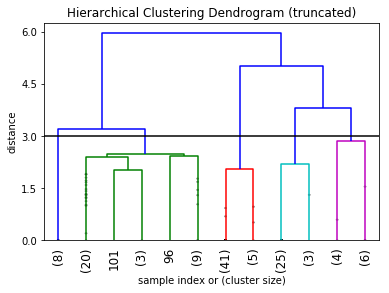

In [17]:
dist = 3

fancy_dendrogram(
            row_linkage,
            truncate_mode='lastp',
            p=12,
            leaf_rotation=90.,
            leaf_font_size=12.,
            show_contracted=True,
            annotate_above=10,
            max_d=dist,
        )
plt.show()

clusters = fcluster(row_linkage,
                    dist,
                    criterion='distance')

groups = collections.defaultdict(list)
for gene, cluster in zip(ri.index.values,
                         clusters):
    groups[cluster].append(gene)

In [18]:
with open('synovial-sarcoma-5-gs-clusters.tsv', 'w') as f:
    f.write("cluster\tgene-sets\n")
    for i, gss in groups.items():
        f.write("%d\t%s\n" % (i, '\t'.join(gss)))

In [19]:
clusters = fcluster(self.row_linkage,
                            dist,
                            criterion='distance')

NameError: name 'self' is not defined

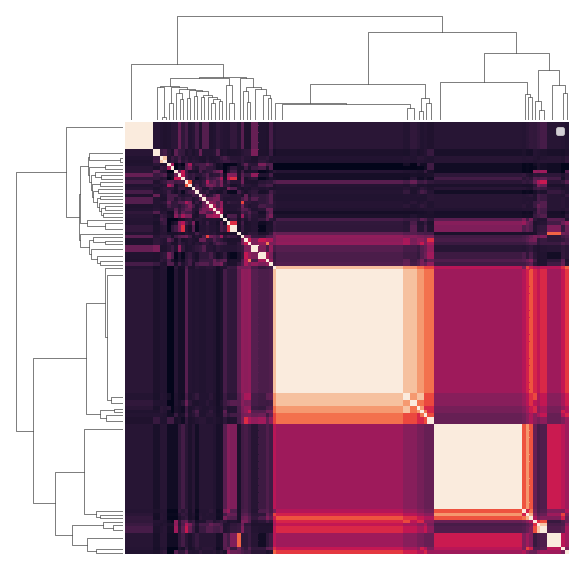

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.clustermap(ri, 
                   row_linkage=row_linkage, 
                   col_linkage=col_linkage,
                   figsize=(10, 10))

g.cax.set_visible(False)

ax = g.ax_heatmap

ax.set_xticks([])
ax.set_yticks([])
ax.legend([])

plt.savefig("synovial-sarcoma-clustermap.svg", bbox_inches='tight', format='svg')

In [ ]:
hits.sort_values("num_clusters", ascending=False).head()

In [ ]:
hits.sort_values('min_prob', ascending=False).head(80)#.to_csv("hydra-gene-set-clustering-scan.tsv", sep='\t')

In [ ]:
hits.sort_values('max_kl', ascending=False).shape

In [ ]:
# REACTOME_TRANSLATION

gs = 'REACTOME_PI_3K_CASCADE'
pth = os.path.join("../sweep-output/output/MultivariateAnalysis", gs)
ass = pd.read_csv(os.path.join(pth, 'assignments.tsv'), sep='\t', index_col=0, header=None)
order = ass.sort_values(1).index.values
exp = pd.read_csv(os.path.join(pth, 'training-data.tsv'), sep='\t', index_col=0)
sns.clustermap(exp.reindex(order, axis=1), 
               z_score=0, 
               col_cluster=False, 
               figsize=(10, 10), 
               method='ward',
               cmap=sns.diverging_palette(240, 10, n=7))